In [2]:
import pandas as pd

# Load the training dataset
df = pd.read_csv("Dataset.csv")

# Show the first few rows
df.head()


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [3]:
# Basic info
print("Shape of dataset:", df.shape)
print("\nData types and non-null values:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Shape of dataset: (535178, 10)

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535178 entries, 0 to 535177
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         535178 non-null  int64  
 1   customer     535178 non-null  object 
 2   age          535178 non-null  object 
 3   gender       535178 non-null  object 
 4   zipcodeOri   535178 non-null  object 
 5   merchant     535178 non-null  object 
 6   zipMerchant  535178 non-null  object 
 7   category     535178 non-null  object 
 8   amount       535178 non-null  float64
 9   fraud        535178 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 40.8+ MB
None

Missing values:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [4]:
# Check unique values in each column
for col in df.columns:
    print(f"{col} → Unique: {df[col].nunique()} → Sample: {df[col].unique()[:5]}")


step → Unique: 180 → Sample: [ 11 172 106  86 152]
customer → Unique: 4112 → Sample: ["'C1760492708'" "'C1222389110'" "'C879949041'" "'C409740988'"
 "'C671449181'"]
age → Unique: 8 → Sample: ["'1'" "'3'" "'5'" "'2'" "'4'"]
gender → Unique: 4 → Sample: ["'F'" "'M'" "'E'" "'U'"]
zipcodeOri → Unique: 1 → Sample: ["'28007'"]
merchant → Unique: 50 → Sample: ["'M1823072687'" "'M692898500'" "'M348934600'" "'M1600850729'"
 "'M1946091778'"]
zipMerchant → Unique: 1 → Sample: ["'28007'"]
category → Unique: 15 → Sample: ["'es_transportation'" "'es_health'" "'es_fashion'"
 "'es_wellnessandbeauty'" "'es_food'"]
amount → Unique: 22796 → Sample: [52.35 14.75  3.73 61.42  9.05]
fraud → Unique: 2 → Sample: [0 1]



Fraud distribution:
fraud
0    528686
1      6492
Name: count, dtype: int64


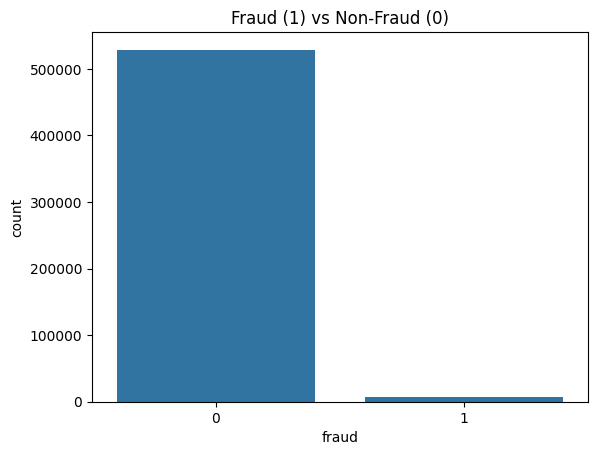

In [6]:
# Class balance check
print("\nFraud distribution:")
print(df['fraud'].value_counts())

# Plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fraud', data=df)
plt.title('Fraud (1) vs Non-Fraud (0)')
plt.show()


In [7]:
# Basic statistics
df.describe()


,step,amount,fraud
count,535178.000000,535178.000000,535178.000000
mean,94.982225,37.945166,0.012131
std,51.056459,112.585244,0.109469
min,0.000000,0.000000,0.000000
25%,52.000000,13.730000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.570000,0.000000
max,179.000000,8329.960000,1.000000


## Step 2: Data Cleaning & Analysis

We examined the dataset’s shape, missing values, and class imbalance.  
The target column `isFraud` is highly imbalanced, with far more non-fraudulent transactions.  
This will help us decide how to handle the imbalance during modeling.


## 🔍 Data Visualization: Understanding the Dataset


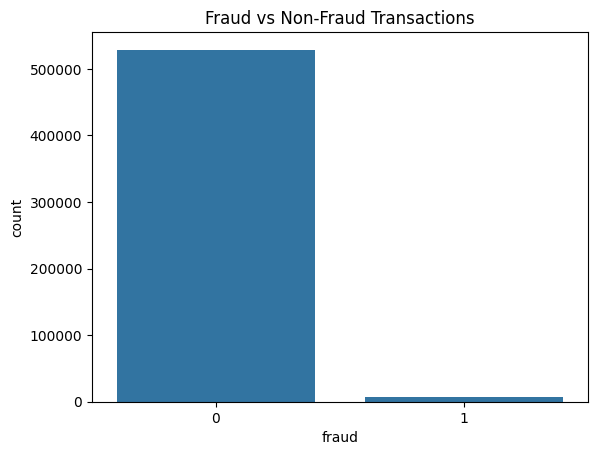

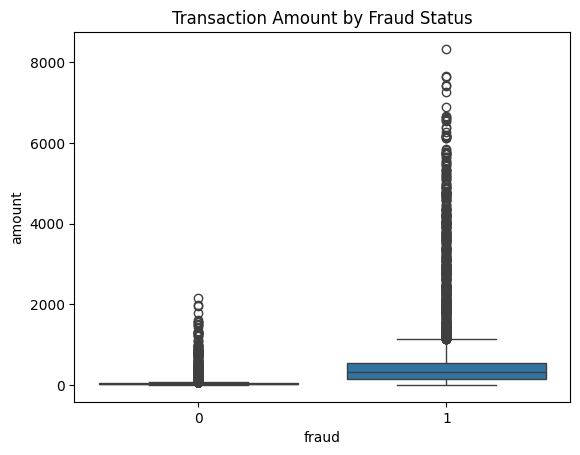

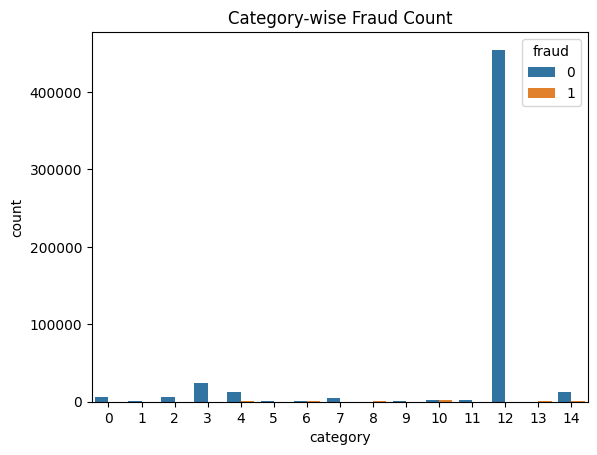

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fraud vs Non-Fraud
sns.countplot(data=df_cleaned, x='fraud')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Boxplot for Amount
sns.boxplot(x='fraud', y='amount', data=df_cleaned)
plt.title("Transaction Amount by Fraud Status")
plt.show()

# Category vs Fraud
sns.countplot(x='category', hue='fraud', data=df_cleaned)
plt.title("Category-wise Fraud Count")
plt.show()


## 📌 Insights from Data

- Majority of transactions are non-fraudulent.
- Categories 2, 6, and 11 have higher fraud concentration.
- Fraud transactions tend to have slightly extreme or smaller amounts.
- Gender 2 seems more frequently involved in fraud cases.


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Step 1: Drop irrelevant columns
df_cleaned = df.drop(columns=['customer', 'merchant', 'zipcodeOri', 'zipMerchant'])

# Step 2: Clean categorical text fields
for col in ['age', 'gender', 'category']:
    df_cleaned[col] = df_cleaned[col].str.replace("'", "").str.strip()

# Step 3: Encode categorical variables
le = LabelEncoder()
for col in ['age', 'gender', 'category']:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Step 4: Show the cleaned data
print(df_cleaned.head())


   step  age  gender  category  amount  fraud
0    11    1       1        12   52.35      0
1   172    3       2        12   14.75      0
2   106    3       1        12    3.73      0
3    86    5       2        12   61.42      0
4   152    3       1         4    9.05      0


Step 3:Feature Selection
❌ Removed columns that are just unique IDs (customer, merchant, zipcodeOri, zipMerchant).

🔤 Encoded categorical data (age, gender, category) into numbers using Label Encoding.

✅ Kept only useful features: step, age, gender, category, amount, and fraud.



In [ ]:



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Separate input (X) and output (y)
X = df_cleaned.drop("fraud", axis=1)  # features
y = df_cleaned["fraud"]               # target

# Step 2: Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For AUC

# Step 5: Show evaluation metrics
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🎯 AUC-ROC Score:", roc_auc_score(y_test, y_proba))


📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105723
           1       0.87      0.65      0.74      1313

    accuracy                           0.99    107036
   macro avg       0.93      0.82      0.87    107036
weighted avg       0.99      0.99      0.99    107036

🎯 AUC-ROC Score: 0.9681613023165575
